In [5]:
# importing libraries
import sys
import pandas
import matplotlib
import seaborn
import sklearn

#printing there versions
print(sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)

3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
0.24.2
3.1.0
0.9.0
0.21.2


In [6]:
#assigning variable for easy use
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#load the dataset
games = pandas.read_csv("games.csv")

In [9]:
#studying columns in dataset
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


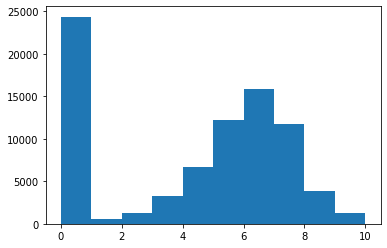

In [10]:
#ploting histogram
plt.hist(games["average_rating"])
plt.show()

In [11]:
# study the data
print(games[games["average_rating"] == 0].iloc[0])

print(games[games["average_rating"] > 0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

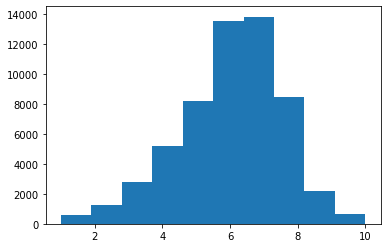

In [12]:
#remove rows without user review
games = games[games["users_rated"] > 0]

# droping null value rows
games = games.dropna(axis = 0)

# creating histogram
plt.hist(games["average_rating"])
plt.show()

In [14]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


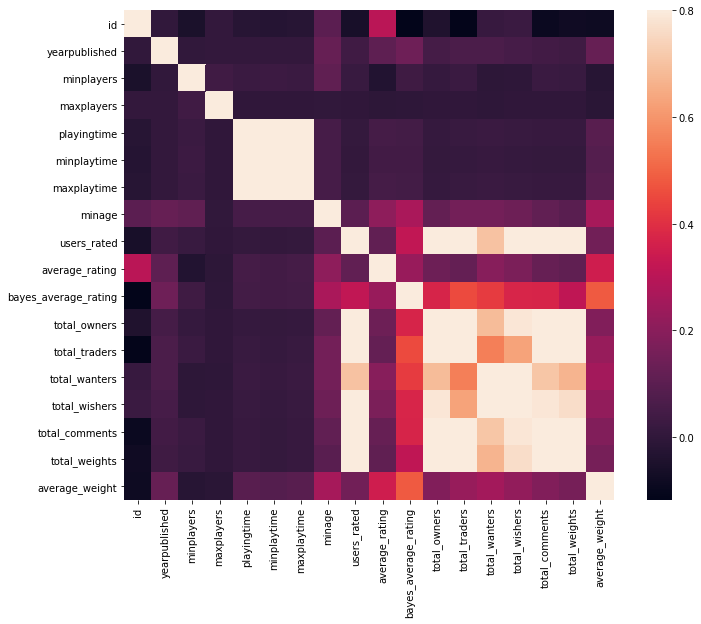

In [18]:
# correlation matrix
corrmat = games.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8 , square= True)
plt.show()

In [21]:
# get all columns from dataframe
columns = games.columns.tolist()

#remove the column we dont want
columns = [ c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]


target = "average_rating"

In [23]:
# generate traning and testing dataset

from sklearn.model_selection import train_test_split

#generet training set

train = games.sample(frac= 0.8 , random_state =1)

test =games.loc[~games.index.isin(train.index)]


print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [27]:
 #import linear regression model
    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
    
    
#initialization of model
    
LR = LinearRegression()
    
LR.fit(train[columns] , train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#generate prediction on testing set

predictions = LR.predict(test[columns])

# compute error between test predict and actual value

mean_squared_error(predictions, test[target])

2.078819032629324

In [33]:
#import random forest

from sklearn.ensemble import RandomForestRegressor

#initialization of model
RFR = RandomForestRegressor(n_estimators = 100 , min_samples_leaf=10 , random_state = 1)


#fitting the data

RFR.fit(train[columns] , train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [34]:
#generate prediction on testing set
predictions = RFR.predict(test[columns])

# compute error between test predict and actual value
mean_squared_error(predictions, test[target])


1.4458560046071653

In [39]:
test[columns].iloc[0]

yearpublished      2008.0000
minplayers            1.0000
maxplayers            5.0000
playingtime         200.0000
minplaytime         100.0000
maxplaytime         200.0000
minage               12.0000
users_rated       15774.0000
total_owners      16429.0000
total_traders       205.0000
total_wanters      1343.0000
total_wishers      5149.0000
total_comments     3458.0000
total_weights      1450.0000
average_weight        3.7531
Name: 14, dtype: float64

In [46]:
#predicting reating for 0th position game

rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

# print prediction

print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [47]:
#checking the actual value
test[target].iloc[0]

8.07933

In [ ]:
# thanks!!!!